In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [4]:
DATA_PATH = r"d:\Users\ASUS\Documents\GitHub\Infrared-Solar-Modules-Classifier\Data\2020-02-14_InfraredSolarModules"
METADATA_PATH = os.path.join(DATA_PATH, 'module_metadata.json')
METADATA_PATH

'd:\\Users\\ASUS\\Documents\\GitHub\\Infrared-Solar-Modules-Classifier\\Data\\2020-02-14_InfraredSolarModules\\module_metadata.json'

In [5]:
df = pd.read_json(METADATA_PATH, orient='index').sort_index()
df['image_filepath'] = df.image_filepath.apply(lambda x: os.path.join(DATA_PATH, x))
print(df.value_counts().sort_values(ascending = True))

image_filepath                                                                                                          anomaly_class 
d:\Users\ASUS\Documents\GitHub\Infrared-Solar-Modules-Classifier\Data\2020-02-14_InfraredSolarModules\images/0.jpg      Offline-Module    1
d:\Users\ASUS\Documents\GitHub\Infrared-Solar-Modules-Classifier\Data\2020-02-14_InfraredSolarModules\images/10000.jpg  No-Anomaly        1
d:\Users\ASUS\Documents\GitHub\Infrared-Solar-Modules-Classifier\Data\2020-02-14_InfraredSolarModules\images/10001.jpg  No-Anomaly        1
d:\Users\ASUS\Documents\GitHub\Infrared-Solar-Modules-Classifier\Data\2020-02-14_InfraredSolarModules\images/10002.jpg  No-Anomaly        1
d:\Users\ASUS\Documents\GitHub\Infrared-Solar-Modules-Classifier\Data\2020-02-14_InfraredSolarModules\images/10003.jpg  No-Anomaly        1
                                                                                                                                         ..
d:\Users\ASUS\Documents\G

There's a class imbalance in the data.
But only between anomalies.

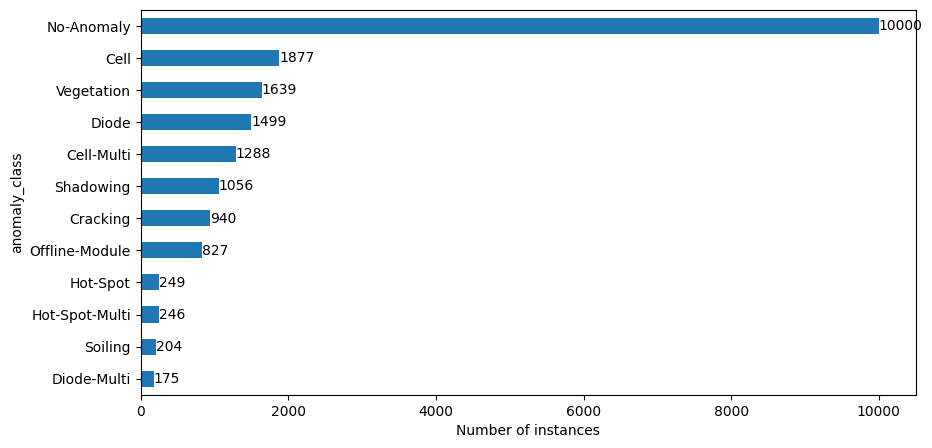

In [6]:

ax = df.anomaly_class.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,5))
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

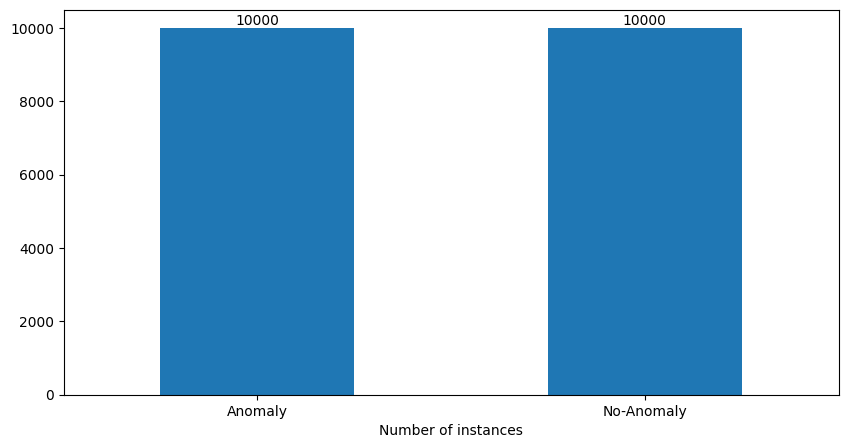

In [7]:
def convert_to_binary(x):
    x = 'Anomaly' if x != 'No-Anomaly' else x
    return x

ax = df.anomaly_class.apply(convert_to_binary).value_counts().plot.bar(figsize=(10,5))
ax.tick_params(labelrotation=0)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

In [9]:
sample = df.groupby('anomaly_class').sample()
print(sample)
print(sample.iloc[2, 0])

                                          image_filepath   anomaly_class
6241   d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...            Cell
4326   d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...      Cell-Multi
7417   d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...        Cracking
1675   d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...           Diode
966    d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...     Diode-Multi
6729   d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...        Hot-Spot
8139   d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...  Hot-Spot-Multi
15317  d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...      No-Anomaly
714    d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...  Offline-Module
3537   d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...       Shadowing
8206   d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...         Soiling
9237   d:\Users\ASUS\Documents\GitHub\Infrared-Solar-...      Vegetation
d:\Users\ASUS\Documents\GitHub\Infrared-Solar-Modul

In [10]:
import cv2
image_path= sample.iloc[2, 0]
imagen = cv2.imread(image_path)
print(imagen.shape)

(40, 24, 3)


In [ ]:
# Cargar el modelo preentrenado VGG16
vgg16 = VGG16(weights='imagenet')

# Cargar y preprocesar la imagen de entrada
img = image.load_img(image_path, target_size=(224, 224))
print(img) 
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# # Obtener las características de la imagen
features = vgg16.predict(x)

# # Imprimir las dimensiones de las características extraídas
features

In [17]:
features[0]

array([7.56389181e-06, 5.07781806e-04, 6.96250718e-05, 1.20173492e-04,
       1.26551808e-04, 4.41314696e-05, 6.27786067e-05, 2.33651692e-04,
       9.35899516e-05, 3.71131755e-04, 3.33789154e-04, 4.97646572e-04,
       5.47813368e-04, 5.07800665e-04, 3.50059650e-04, 3.11021577e-04,
       6.06176152e-04, 1.77399153e-04, 6.48724323e-04, 4.26600891e-04,
       3.06945323e-04, 7.87254248e-04, 7.53731409e-04, 6.75052055e-04,
       1.63896781e-04, 4.76414643e-05, 1.27172403e-04, 9.42436964e-05,
       2.96806174e-05, 1.09776091e-04, 2.15733671e-05, 1.09944718e-04,
       2.47826993e-05, 5.34276296e-05, 8.31420984e-05, 3.65944034e-05,
       2.09773149e-04, 1.93527067e-05, 5.72572790e-05, 1.08554079e-04,
       1.90524530e-04, 4.55538284e-05, 1.42568009e-04, 8.32413425e-05,
       7.74410219e-05, 1.39540425e-04, 3.05371563e-04, 1.01620928e-04,
       9.87607564e-05, 8.19867710e-05, 2.81500485e-04, 7.14658090e-05,
       4.01022044e-05, 6.82106547e-05, 1.23986727e-04, 1.16653944e-04,
      